# Importing necessary packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
#plotting the best parameters
import matplotlib.patches as mpatches


from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.metrics import roc_curve
import numpy as np

# Reading the collected dataset

In [2]:
path = '/Ml files/suicide ideation/Suicide Ideation Detection using natural Language Processing'


In [3]:
df = pd.read_csv(path + '/dataset/suicidewatch_cleaned_df.csv')

# Suffling the dataset

In [4]:
df =  shuffle(df).reset_index(drop=True)
df.head()

,text,label,cleaned_text
0,I don't even know why I'm botheringI don't. I'...,1,even know botheringi dont fail everywhere else...
1,I'm thinking about ending my sufferingThe last...,1,think end sufferingthe last couple year abusiv...
2,Nothing but regrets - Suicide has been on the ...,1,nothing regret suicide table year nowi good li...
3,"Yeah, sex is cool and all, But have you ever l...",0,yeah sex cool ever listen echo pink floyd show...
4,(Fixed) Please crush my head with your Thighs ...,0,fix please crush head thigh please im talk


# Tokenizing the cleaned text

In [5]:
#removing shortwords
df.cleaned_text=df['cleaned_text'].astype(str)
tokenized_df=df['cleaned_text'].apply(lambda x: x.split())
tokenized_df.head(5)

0    [even, know, botheringi, dont, fail, everywher...
1    [think, end, sufferingthe, last, couple, year,...
2    [nothing, regret, suicide, table, year, nowi, ...
3    [yeah, sex, cool, ever, listen, echo, pink, fl...
4    [fix, please, crush, head, thigh, please, im, ...
Name: cleaned_text, dtype: object

In [6]:
df['cleaned_text']=df['cleaned_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head(5)

,text,label,cleaned_text
0,I don't even know why I'm botheringI don't. I'...,1,even know botheringi dont fail everywhere else...
1,I'm thinking about ending my sufferingThe last...,1,think sufferingthe last couple year abusive re...
2,Nothing but regrets - Suicide has been on the ...,1,nothing regret suicide table year nowi good li...
3,"Yeah, sex is cool and all, But have you ever l...",0,yeah cool ever listen echo pink floyd shower p...
4,(Fixed) Please crush my head with your Thighs ...,0,please crush head thigh please talk


# Feature extraction with Count Vectorizer

In [7]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english', max_features=15000, min_df=5,ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['cleaned_text'].astype('U'))

# Train test split
80% as training data and 20% as testing data

In [8]:
from sklearn.model_selection import train_test_split
X=text_counts
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)

In [9]:
print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (185659, 15000)
x_test:  (46415, 15000)
y_train:  (185659,)
y_test:  (46415,)


# Confusion Matrix

In [10]:
def plot_cm(y_true, y_pred,filename, figsize=(8,8)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d' % (p, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=['non-suicidal', 'suicidal'], columns=['non-suicidal', 'suicidal'])
    sns.set(font_scale=2) # Adjust to fit
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "Blues", annot=annot, fmt='', ax=ax)
    plt.ylabel('True label',fontsize=18)
    plt.xlabel('Predicted label',fontsize=18)
    plt.xticks( rotation=0, weight = 'bold')
    plt.yticks( rotation=90, weight = 'bold')
    plt.show()
    plt.close()

# Training the models

In [11]:
def Model(model,name):
    model.fit(X_train,y_train)
    cross = cross_val_score(model, X, y, cv = 10, n_jobs = -1,scoring = 'accuracy')
    print("Cross Validation score = ",cross)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    print('{} Trainng Score {}\n'.format(name,model_train_score))
    print('{} Testing Score {}\n'.format(name,model_test_score))
    plot_cm(y_test, prediction,name)
    return cross

## MultinomialNB

Cross Validation score =  [0.89788004 0.89619959 0.89826784 0.8946484  0.89662602 0.89929763
 0.89839273 0.89429913 0.89679838 0.89554876]
Multinomial Naive Bayes Trainng Score 0.9017715273700709

Multinomial Naive Bayes Testing Score 0.8970160508456319



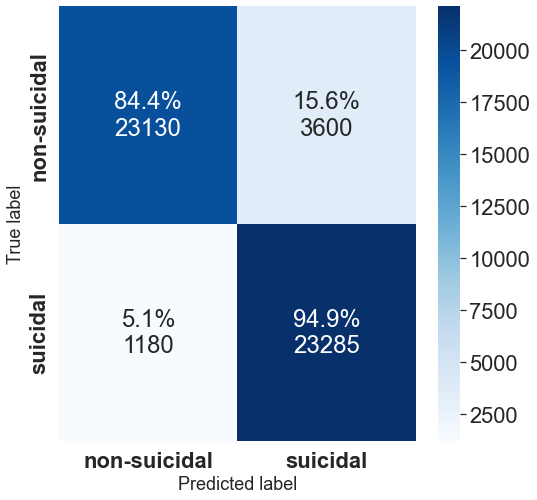

In [12]:

MNB = MultinomialNB(alpha=0.15,fit_prior=True, class_prior=None)
MNB_model = Model(MNB,"Multinomial Naive Bayes")

## SGD classifier

Cross Validation score =  [0.92011375 0.91675284 0.9195536  0.91658049 0.915198   0.91812815
 0.9179127  0.91769725 0.91993795 0.92049813]
SGD classifier Trainng Score 0.9290473394772136

SGD classifier Testing Score 0.9159538942152321



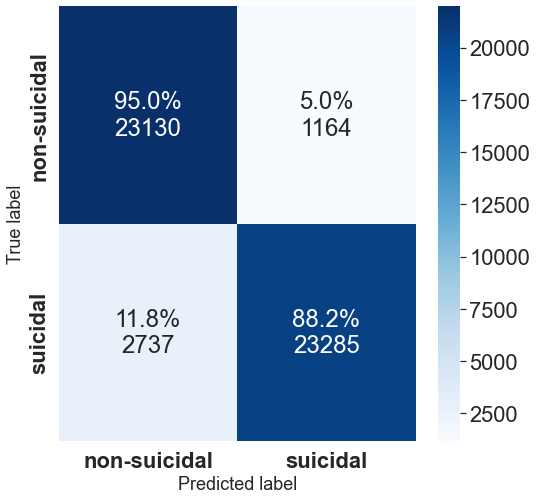

In [13]:

SGD = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, random_state=42, max_iter=200, tol=None)
SGD_model = Model(SGD,"SGD classifier")

## Logistic Regression

C:\Users\Ovi\anaconda3\envs\tensrgpu\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Cross Validation score =  [0.92084626 0.91783006 0.91864874 0.91645122 0.92041194 0.92101521
 0.91955014 0.92097212 0.9197225  0.90567501]
Logistic Regression classifier Trainng Score 0.9285248762516226

Logistic Regression classifier Testing Score 0.915738446622859



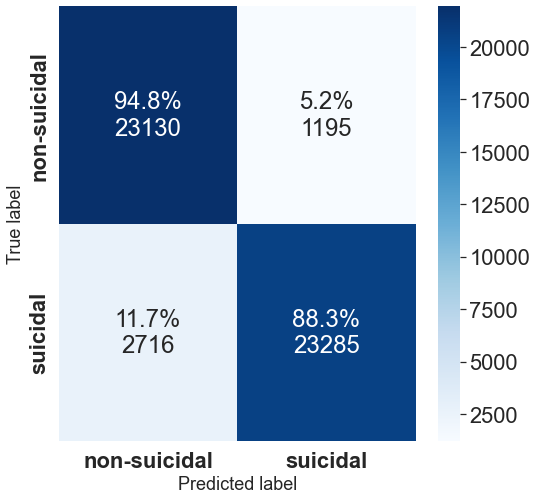

In [14]:

LR = LogisticRegression(penalty='l2',multi_class='ovr',solver='liblinear',C=0.8,random_state=42,tol=0.0001,max_iter=200)
LR_model = Model(LR,"Logistic Regression classifier")

## Random Forest Classifier

Cross Validation score =  [0.89270941 0.89434678 0.89042572 0.88887453 0.88921446 0.89335114
 0.89416986 0.89386823 0.89434222 0.89343732]
Randomforrenst classifier Trainng Score 0.9977539467518407

Randomforrenst classifier Testing Score 0.8910050630184208



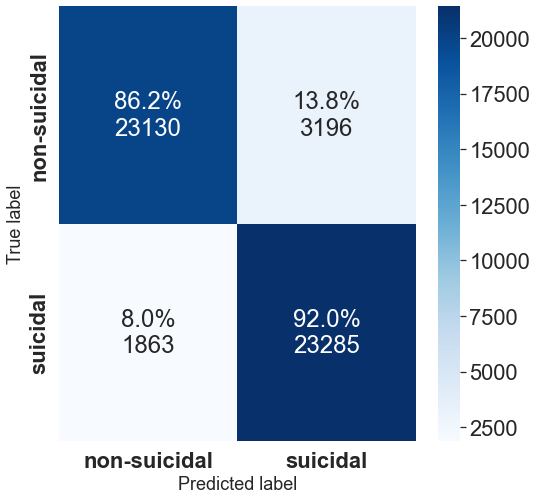

In [15]:
RF = RandomForestClassifier(n_estimators=200,criterion ='entropy')
RF_model = Model(RF,"Randomforrenst classifier")

## SVC

Cross Validation score =  [0.90283523 0.90175801 0.89874181 0.89869872 0.90127979 0.90218469
 0.89994398 0.90171069 0.90136597 0.90244323]
Support Vector classifier Trainng Score 0.9103248428570659

Support Vector classifier Testing Score 0.9022945168587742



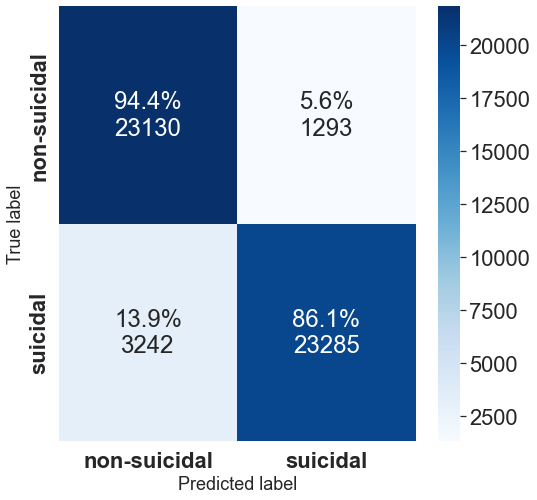

In [16]:
SVC = SVC(random_state=42)
SVC_model = Model(SVC,"Support Vector classifier")

## XGB

In [17]:
!pip install xgboost

Cross Validation score =  [0.90042227 0.89964667 0.89762151 0.89602723 0.89675529 0.89740165
 0.90063343 0.90071961 0.8989529  0.90115051]
XGB classifier Trainng Score 0.9076425058844441

XGB classifier Testing Score 0.8980286545297856



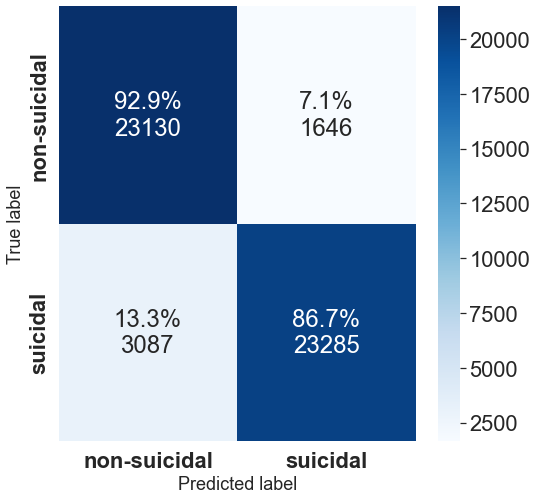

In [18]:
import xgboost as xgb
XGB = xgb.XGBClassifier(n_jobs=1)
XGB_model = Model(XGB,"XGB classifier")

## Passive Aggressive Classifier

Cross Validation score =  [0.89305412 0.89477766 0.89158911 0.88654774 0.8903779  0.88710303
 0.8917568  0.8885681  0.88930064 0.88874047]
Passive Aggressive Classifier Trainng Score 0.9056172876079264

Passive Aggressive Classifier Testing Score 0.8762684477000969



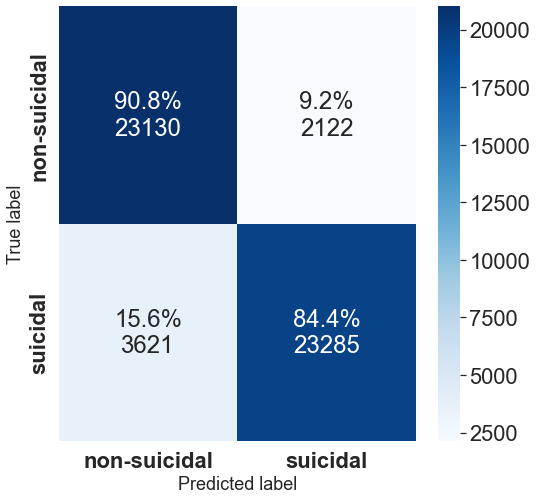

In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier
PAG = PassiveAggressiveClassifier(random_state=42,max_iter=500,tol=None)
PAG_model = Model(PAG,"Passive Aggressive Classifier")

# Performance comparison

In [23]:
MLA = {
    'MNB' : MNB,
    'SGD' : SGD,
    'LR' : LR,
    'RF' : RF,
    'SVC' : SVC,
    'XGB' : XGB,
    'PAG' : PAG,
}

In [24]:
columns = []
compare = pd.DataFrame(columns = columns)
fpr = dict()
tpr = dict()
roc_auc = dict()
row_index = 0
for name,alg in MLA.items():
    MLA_name = name
    predicted = alg.predict(X_test)
    auc_score = roc_auc_score(y_test, predicted)
    micro_averaged_recall = recall_score(y_test, predicted, average = 'micro')
    macro_averaged_f1 = f1_score(y_test, predicted, average = 'macro')
    precisions =precision_score(y_test, predicted, average = 'micro')
    
    compare.loc[row_index,'Name'] = MLA_name
    compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    compare.loc[row_index, 'AUC'] = auc_score
    compare.loc[row_index, 'Precision'] = precisions
    compare.loc[row_index, 'Recall'] = micro_averaged_recall
    compare.loc[row_index, 'F1 Score'] = macro_averaged_f1
    row_index+=1

compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
compare

,Name,Test Accuracy,AUC,Precision,Recall,F1 Score
1,SGD,0.9160,0.916066,0.915954,0.915954,0.915875
2,LR,0.9157,0.915847,0.915738,0.915738,0.915665
4,SVC,0.9023,0.902434,0.902295,0.902295,0.902148
5,XGB,0.8980,0.898131,0.898029,0.898029,0.897950
0,MNB,0.8970,0.896841,0.897016,0.897016,0.896698
3,RF,0.8910,0.890908,0.891005,0.891005,0.890893
6,PAG,0.8763,0.876375,0.876268,0.876268,0.876165


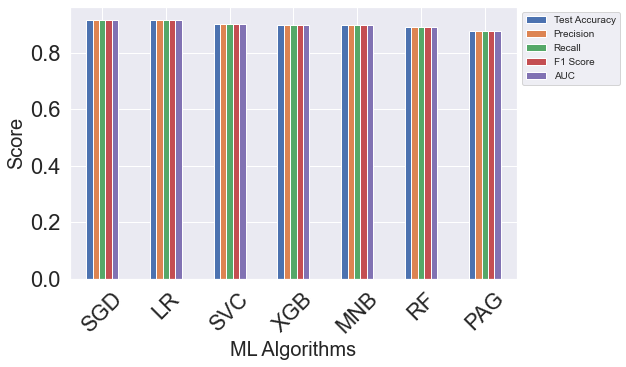

In [25]:
#plot comaparison 
compare.plot(x="Name", y=["Test Accuracy", "Precision", "Recall", "F1 Score", "AUC"], kind="bar",figsize=(8, 5))
plt.xlabel('ML Algorithms',fontsize=20)
plt.ylabel('Score',fontsize=20)
plt.xticks(rotation = 45)
plt.legend(loc = 2, bbox_to_anchor = (1,1),prop={'size': 10})
plt.show()

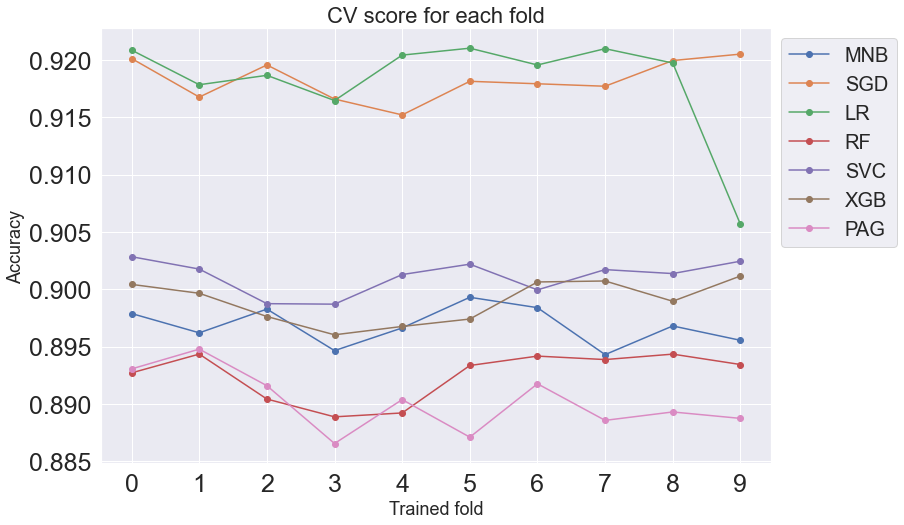

In [26]:
plt.figure(figsize=(12,8))
n_folds=10
plt.plot(MNB_model,marker='o')
plt.plot(SGD_model,marker='o')
plt.plot(LR_model,marker='o')
plt.plot(RF_model,marker='o')
plt.plot(SVC_model,marker='o')
plt.plot(XGB_model,marker='o')
plt.plot(PAG_model,marker='o')
plt.title('CV score for each fold',fontsize=22)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Trained fold',fontsize=18)
plt.xticks([k for k in range(n_folds)])
plt.tick_params(axis='x',rotation=0,labelsize=25)
plt.tick_params(axis='y',rotation=0,labelsize=25)
plt.legend(['MNB', 'SGD', 'LR', 'RF', 'SVC', 'XGB', 'PAG'], loc=2,bbox_to_anchor = (1,1), prop={'size': 20})
plt.show()